In [34]:
import pandas as pd

input_path = "data/TFF_Isolation/"
output_path = input_path + "processed/"
df_multi_group = pd.read_excel(input_path + "ST3909_Proj_155_3_AG_Nazarenko_Ftest_multigroup_limma_results.xlsx") 
df_multi_group

,Log2 fold change EV/Ctrl,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
0,5.542202,-0.162447,5.379756,18.407863,110.771190,1.116041e-07,0.00001,P40926,MDH2,"Malate dehydrogenase, mitochondrial"
1,4.206573,0.230492,4.437065,19.151769,91.568632,2.829821e-07,0.00001,P05556,ITGB1,Integrin beta-1
2,5.578787,0.015519,5.594306,18.790141,110.891103,3.347983e-07,0.00001,P11047;Q9Y6N6,NaN,NaN
3,3.717479,-0.297074,3.420405,19.219070,87.639923,3.501737e-07,0.00001,P18669;P15259;Q8N0Y7,NaN,NaN
4,4.659921,0.235181,4.895102,18.663681,87.230810,3.582142e-07,0.00001,O14786,NRP1,Neuropilin-1
...,...,...,...,...,...,...,...,...,...,...
695,NaN,-0.737234,NaN,15.567100,NaN,NaN,NaN,Q8IXL6;Q96MK3,FAM20C;FAM20A,Extracellular serine/threonine protein kinase ...
696,NaN,0.261662,NaN,15.572802,NaN,NaN,NaN,P23588,EIF4B,Eukaryotic translation initiation factor 4B
697,NaN,-0.412297,NaN,15.644453,NaN,NaN,NaN,Q8NC51,SERBP1,Plasminogen activator inhibitor 1 RNA-binding ...
698,NaN,-0.253792,NaN,15.781895,NaN,NaN,NaN,Q9BZZ5,API5,Apoptosis inhibitor 5


In [35]:
df_multi_group_t8 = df_multi_group.iloc[:, 1:]
df_multi_group_t8

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
0,-0.162447,5.379756,18.407863,110.771190,1.116041e-07,0.00001,P40926,MDH2,"Malate dehydrogenase, mitochondrial"
1,0.230492,4.437065,19.151769,91.568632,2.829821e-07,0.00001,P05556,ITGB1,Integrin beta-1
2,0.015519,5.594306,18.790141,110.891103,3.347983e-07,0.00001,P11047;Q9Y6N6,NaN,NaN
3,-0.297074,3.420405,19.219070,87.639923,3.501737e-07,0.00001,P18669;P15259;Q8N0Y7,NaN,NaN
4,0.235181,4.895102,18.663681,87.230810,3.582142e-07,0.00001,O14786,NRP1,Neuropilin-1
...,...,...,...,...,...,...,...,...,...
695,-0.737234,NaN,15.567100,NaN,NaN,NaN,Q8IXL6;Q96MK3,FAM20C;FAM20A,Extracellular serine/threonine protein kinase ...
696,0.261662,NaN,15.572802,NaN,NaN,NaN,P23588,EIF4B,Eukaryotic translation initiation factor 4B
697,-0.412297,NaN,15.644453,NaN,NaN,NaN,Q8NC51,SERBP1,Plasminogen activator inhibitor 1 RNA-binding ...
698,-0.253792,NaN,15.781895,NaN,NaN,NaN,Q9BZZ5,API5,Apoptosis inhibitor 5


In [36]:
df_p_val_corrected = df_multi_group_t8[df_multi_group_t8["p value"] < 0.05]
df_p_val_corrected, df_p_val_corrected.columns 

(     Log2 fold change T8/EV  Log2 fold change T8/Ctrl  Average Expression  \
 0                 -0.162447                  5.379756           18.407863   
 1                  0.230492                  4.437065           19.151769   
 2                  0.015519                  5.594306           18.790141   
 3                 -0.297074                  3.420405           19.219070   
 4                  0.235181                  4.895102           18.663681   
 ..                      ...                       ...                 ...   
 109               -0.434425                  1.202407           18.435171   
 110               -0.101496                  1.833872           19.750883   
 111               -0.391843                  1.248289           17.686449   
 112                0.448402                 -0.751345           18.816638   
 113                0.212937                  1.384582           16.989521   
 
          F test       p value  adjusted p value              

In [37]:
log2FC_threshold = 1 
df_t8_ev_upregulated = df_p_val_corrected[df_p_val_corrected["Log2 fold change T8/EV"] >= log2FC_threshold]
df_t8_ev_upregulated.to_csv(output_path + "T8-EV-Upregulated.csv", sep="\t", index=None)
df_t8_ev_upregulated

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
69,1.16695,3.162134,17.506837,23.80836,0.000222,0.000451,P24821,TNC,Tenascin


In [38]:
df_t8_ev_downregulated = df_p_val_corrected[df_p_val_corrected["Log2 fold change T8/EV"] < -log2FC_threshold]
df_t8_ev_downregulated.to_csv(output_path + "T8-EV-Downregulated.csv", sep="\t", index=None)
df_t8_ev_downregulated

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name


In [39]:
df_t8_ctrl_upregulated = df_p_val_corrected[df_p_val_corrected["Log2 fold change T8/Ctrl"] >= log2FC_threshold]
df_t8_ctrl_upregulated = df_t8_ctrl_upregulated.sort_values(by="Log2 fold change T8/Ctrl", ascending=False)
df_t8_ctrl_upregulated.to_csv(output_path + "T8-Control-Upregulated.csv", sep="\t", index=None)
df_t8_ctrl_upregulated

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
13,0.312758,7.321975,19.126532,65.400542,1.431111e-06,0.000015,O00468,AGRN,Agrin;Agrin N-terminal 110 kDa subunit;Agrin C...
83,-0.075278,6.661384,20.533344,14.343186,1.062449e-03,0.001796,P06733,ENO1,Alpha-enolase
6,-0.364884,6.498281,19.571889,62.772931,7.747797e-07,0.000015,P00338,LDHA,L-lactate dehydrogenase A chain
15,0.809358,6.373974,19.950769,50.645697,2.327404e-06,0.000021,P02751,FN1,Fibronectin;Anastellin;Ugl-Y1;Ugl-Y2;Ugl-Y3
8,0.540908,6.110886,20.926120,58.282167,1.136054e-06,0.000015,P00749,PLAU,Urokinase-type plasminogen activator;Urokinase...
...,...,...,...,...,...,...,...,...,...
113,0.212937,1.384582,16.989521,4.533238,4.683879e-02,0.058343,P11021,HSPA5,78 kDa glucose-regulated protein
104,0.248408,1.371065,19.187900,5.793209,2.067726e-02,0.027964,P35052,GPC1,Glypican-1;Secreted glypican-1
111,-0.391843,1.248289,17.686449,4.564889,3.814550e-02,0.048363,P68371;P04350;Q3ZCM7,NaN,NaN
109,-0.434425,1.202407,18.435171,4.988337,3.382622e-02,0.043528,P13591,NCAM1,Neural cell adhesion molecule 1


In [40]:
df_t8_ctrl_downregulated = df_p_val_corrected[df_p_val_corrected["Log2 fold change T8/Ctrl"] < -log2FC_threshold]
df_t8_ctrl_downregulated = df_t8_ctrl_downregulated.sort_values(by='Log2 fold change T8/Ctrl', ascending=True)
df_t8_ctrl_downregulated.to_csv(output_path + "T8-Control-Downregulated.csv", sep="\t", index=None)
df_t8_ctrl_downregulated

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name
68,-0.338504,-2.809848,16.801586,24.252490,0.000207,0.000426,Q8NI36,WDR36,WD repeat-containing protein 36
65,0.643936,-2.383547,22.259092,22.292382,0.000183,0.000394,P02656,APOC3,Apolipoprotein C-III
93,0.035237,-1.951299,18.238177,11.246465,0.002585,0.003906,P04114,APOB,Apolipoprotein B-100;Apolipoprotein B-48
96,-0.040337,-1.558692,19.227832,9.246708,0.005046,0.007387,P02753,RBP4,Retinol-binding protein 4;Plasma retinol-bindi...


In [41]:
import numpy as np 
import matplotlib.pyplot as plt

def plot_differential_genes(df, name, fc_colname):
    
    df["A"] = df["Average Expression"]
    df["M"] = df[fc_colname]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(df["A"], df["M"], alpha=0.5)
    plt.axhline(y=0, color="red", linestyle="--")  # Reference line at M=0
    
    # Annotate points exceeding threshold
    for i, row in df.iterrows():
        if row["Gene name"] is not np.nan:
            plt.annotate(row["Gene name"], (row["A"], row["M"]), fontsize=9, alpha=0.8)
        else:
            plt.annotate(row["Protein"], (row["A"], row["M"]), fontsize=9, alpha=0.8)

    plt.xlabel("A (Mean Expression)")
    plt.ylabel("M (Log2 Fold Change)")
    plt.title("{}: MA Plot for {}".format("TFF Isolation: ", name))
    plt.grid(True)
    plt.savefig(output_path + "{}_MA_plot_for_{}.png".format("TFF_isolation", name), dpi=300)
    plt.show()

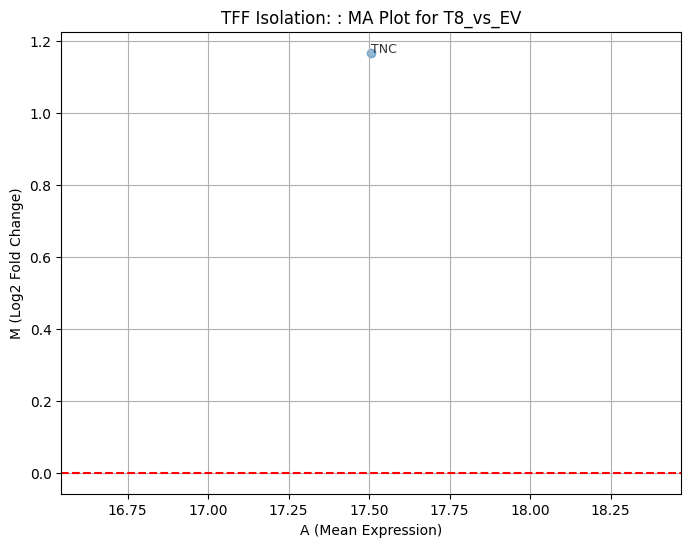

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name,A,M
69,1.16695,3.162134,17.506837,23.80836,0.000222,0.000451,P24821,TNC,Tenascin,17.506837,1.16695


In [42]:
df_t8_ev_differential_genes = pd.concat([df_t8_ev_upregulated, df_t8_ev_downregulated])
plot_differential_genes(df_t8_ev_differential_genes, "T8_vs_EV", "Log2 fold change T8/EV")
df_t8_ev_differential_genes

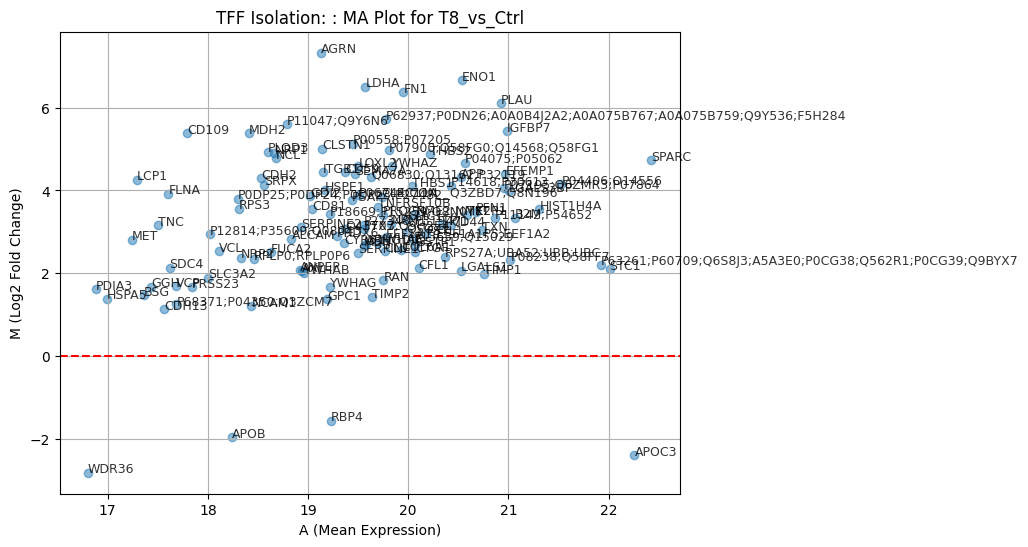

,Log2 fold change T8/EV,Log2 fold change T8/Ctrl,Average Expression,F test,p value,adjusted p value,Protein,Gene name,Protein name,A,M
13,0.312758,7.321975,19.126532,65.400542,1.431111e-06,0.000015,O00468,AGRN,Agrin;Agrin N-terminal 110 kDa subunit;Agrin C...,19.126532,7.321975
83,-0.075278,6.661384,20.533344,14.343186,1.062449e-03,0.001796,P06733,ENO1,Alpha-enolase,20.533344,6.661384
6,-0.364884,6.498281,19.571889,62.772931,7.747797e-07,0.000015,P00338,LDHA,L-lactate dehydrogenase A chain,19.571889,6.498281
15,0.809358,6.373974,19.950769,50.645697,2.327404e-06,0.000021,P02751,FN1,Fibronectin;Anastellin;Ugl-Y1;Ugl-Y2;Ugl-Y3,19.950769,6.373974
8,0.540908,6.110886,20.926120,58.282167,1.136054e-06,0.000015,P00749,PLAU,Urokinase-type plasminogen activator;Urokinase...,20.926120,6.110886
...,...,...,...,...,...,...,...,...,...,...,...
108,-0.071273,1.136495,17.559873,5.254457,2.980794e-02,0.038832,P55290,CDH13,Cadherin-13,17.559873,1.136495
68,-0.338504,-2.809848,16.801586,24.252490,2.069880e-04,0.000426,Q8NI36,WDR36,WD repeat-containing protein 36,16.801586,-2.809848
65,0.643936,-2.383547,22.259092,22.292382,1.831669e-04,0.000394,P02656,APOC3,Apolipoprotein C-III,22.259092,-2.383547
93,0.035237,-1.951299,18.238177,11.246465,2.585465e-03,0.003906,P04114,APOB,Apolipoprotein B-100;Apolipoprotein B-48,18.238177,-1.951299


In [43]:
df_t8_ctrl_differential_genes = pd.concat([df_t8_ctrl_upregulated, df_t8_ctrl_downregulated])
plot_differential_genes(df_t8_ctrl_differential_genes, "T8_vs_Ctrl", "Log2 fold change T8/Ctrl")
df_t8_ctrl_differential_genes